In [56]:
import pandas as pd
import seaborn as sns
import pyproj
import numpy as np

In [57]:
from dwca.read import DwCAReader

In [58]:
survey_data = pd.read_csv("year_species.csv")

In [59]:
survey_data.head()

,species;year
0,Culiseta annulata;2010
1,Culiseta annulata;2010
2,Aedes cantans;2010
3,Aedes cantans;2010
4,Culex pipiens;2010


In [60]:
from dwca.read import DwCAReader

with DwCAReader('dwca-modirisk-monitoring-2-v3.5.zip') as dwca:
   print("Core data file is: {}".format(dwca.descriptor.core.file_location)) # => 'occurrence.txt'
   core_df = dwca.pd_read('occurrence.txt', parse_dates=True)


Core data file is: occurrence.txt


In [61]:
# Number of records for each institutioncode
core_df["institutionCode"].value_counts()

ITM     1172
UCL      792
KBIN     418
Name: institutionCode, dtype: int64

In [62]:
# Select the coordinate information of the first twenty records
core_df.loc[:20, ["decimalLatitude", "decimalLongitude"]]



,decimalLatitude,decimalLongitude
0,51.094311,5.58190
1,50.931782,5.40225
2,50.931782,5.40225
3,50.931782,5.40225
4,50.787769,5.14779
5,50.805752,5.63479
6,50.913391,5.66334
7,50.765491,5.21426
8,50.765491,5.21426
9,51.092731,5.45712


In [63]:
# Count the number of records with date information after 1950
sum(core_df["year"] > 1950)



2382

In [64]:
# Convert eventDate to DateTime python object
core_df['eventDate'] = pd.to_datetime(core_df['eventDate'])



In [65]:
# Select only those records with coordinates, not (0, 0) coordinates and eventDate provided
core_df[(core_df["decimalLatitude"] != 0.0) &
        (core_df["decimalLatitude"].notnull()) &
        (core_df["decimalLongitude"] != 0.0) &
        (core_df["decimalLongitude"].notnull()) &
        (core_df["eventDate"].notnull())]



,id,type,license,institutionCode,basisOfRecord,dynamicProperties,occurrenceID,individualCount,sex,samplingProtocol,...,municipality,locality,locationRemarks,decimalLatitude,decimalLongitude,geodeticDatum,identifiedBy,scientificName,genus,specificEpithet
0,MODIRISK:43,Event,CC BY 2.0 BE,ITM,HumanObservation,Stagnant water=false;Running water=false;Poten...,MODIRISK:43,3,Female,Mosquito Magnet Liberty Plus,...,Gruitrode,NaN,NaN,51.094311,5.58190,EPSG:4326,Veerle,Anopheles plumbeus,Anopheles,plumbeus
1,MODIRISK:48,Event,CC BY 2.0 BE,ITM,HumanObservation,Stagnant water=true;Running water=false;Potent...,MODIRISK:48,1,Female,Mosquito Magnet Liberty Plus,...,Diepenbeek,NaN,"wijk in de buurt van landbouw, achter tuin vis...",50.931782,5.40225,EPSG:4326,Veerle,Ochlerotatus cantans,Ochlerotatus,cantans
2,MODIRISK:49,Event,CC BY 2.0 BE,ITM,HumanObservation,Stagnant water=true;Running water=false;Potent...,MODIRISK:49,6,Female,Mosquito Magnet Liberty Plus,...,Diepenbeek,NaN,"wijk in de buurt van landbouw, achter tuin vis...",50.931782,5.40225,EPSG:4326,Veerle,Culex pipiens,Culex,pipiens
3,MODIRISK:50,Event,CC BY 2.0 BE,ITM,HumanObservation,Stagnant water=true;Running water=false;Potent...,MODIRISK:50,1,Male,Mosquito Magnet Liberty Plus,...,Diepenbeek,NaN,"wijk in de buurt van landbouw, achter tuin vis...",50.931782,5.40225,EPSG:4326,Veerle,Culex pipiens,Culex,pipiens
4,MODIRISK:51,Event,CC BY 2.0 BE,ITM,HumanObservation,Stagnant water=false;Running water=false;Poten...,MODIRISK:51,1,Female,Mosquito Magnet Liberty Plus,...,Velm,Langstraat,val uitgezet (gas dichtgedraaid),50.787769,5.14779,EPSG:4326,Veerle,Culex pipiens,Culex,pipiens
5,MODIRISK:52,Event,CC BY 2.0 BE,ITM,HumanObservation,Stagnant water=false;Running water=false;Poten...,MODIRISK:52,1,Female,Mosquito Magnet Liberty Plus,...,Millen,Kleuzenstraat,NaN,50.805752,5.63479,EPSG:4326,Veerle,Culex pipiens,Culex,pipiens
6,MODIRISK:53,Event,CC BY 2.0 BE,ITM,HumanObservation,Stagnant water=true;Running water=true;Potenti...,MODIRISK:53,1,Female,Mosquito Magnet Liberty Plus,...,Lanaken,22 Romeinendreef,ancient heathland,50.913391,5.66334,EPSG:4326,Veerle,Ochlerotatus communis,Ochlerotatus,communis
7,MODIRISK:54,Event,CC BY 2.0 BE,ITM,HumanObservation,Stagnant water=false;Running water=false;Poten...,MODIRISK:54,2,Female,Mosquito Magnet Liberty Plus,...,Mielen-Boven-Aalst,Veertstraat,NaN,50.765491,5.21426,EPSG:4326,Veerle,Culex pipiens,Culex,pipiens
8,MODIRISK:55,Event,CC BY 2.0 BE,ITM,HumanObservation,Stagnant water=false;Running water=false;Poten...,MODIRISK:55,1,Male,Mosquito Magnet Liberty Plus,...,Mielen-Boven-Aalst,Veertstraat,NaN,50.765491,5.21426,EPSG:4326,Veerle,Culex pipiens,Culex,pipiens
9,MODIRISK:56,Event,CC BY 2.0 BE,ITM,HumanObservation,Stagnant water=false;Running water=true;Potent...,MODIRISK:56,1,Female,Mosquito Magnet Liberty Plus,...,Peer,5 Nieuwdorp,potential breeding site = not clear,51.092731,5.45712,EPSG:4326,Veerle,Culex pipiens,Culex,pipiens


In [66]:
# Count the number of records for each species for each month
count_occ = core_df.pivot_table(index="scientificName",
                                columns="individualCount",
                                values="id",
                                aggfunc='count')

In [67]:
%matplotlib inline

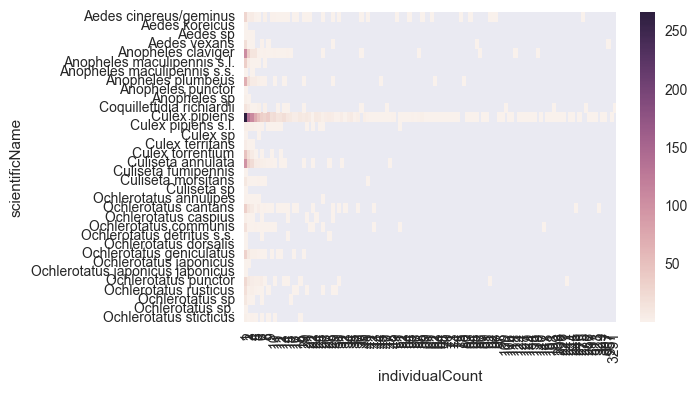

In [68]:
# Visualisation of the counts on a heatmap (Seaborn)
sns.heatmap(count_occ, )

In [69]:
%matplotlib inline

In [70]:
import pandas as pd
import folium as fl

In [71]:
def species_on_map(df, background='Stamen Terrain'):
    """plot species occurrences on a map with markers
    
    Parameters
    ----------
    df: Pandas.DataFrame
        dataframe with DarwinCore terms. For coorindates, the column names decimalLatitude and decimalLongitude will be used.
    background: str
        valid name for folium background tiles
    """
    map_1 = fl.Map(location=df[['decimalLatitude', 'decimalLongitude']].mean().values.tolist(),
                   zoom_start=8,
                   tiles=background)
    
    # remove Nan coordinate values as folium skips all points after Nan
    df = df[df[['decimalLatitude', 'decimalLongitude']].notnull().sum(axis=1) != 0]
    
    for ids, row in df.iterrows():
        fl.Marker(row[['decimalLatitude', 'decimalLongitude']].values.tolist(), 
                   popup=fol.Popup(row["scientificName"])).add_to(map_1)
    print(ids, "markers printed.")
    return map_1

In [72]:
map_osm = fl.Map(location=[50.5236, 5.6750])

In [73]:
map_osm

In [75]:
from species_map_functions import species_on_map, clustered_species_on_map

In [76]:
map_it = species_on_map(core_df, background='Stamen Terrain')
map_it.save("my_species.html")

2381 markers printed.


In [44]:
def species_clustered_on_map(df, background='Stamen Terrain'):
    """plot species occurrences on a map with markers
    
    Parameters
    ----------
    df: Pandas.DataFrame
        dataframe with DarwinCore terms. For coorindates, the column names decimalLatitude and decimalLongitude will be used.
    background: str
        valid name for folium background tiles
    """
    map_1 = fol.Map(location=df[['decimalLatitude', 'decimalLongitude']].mean().values.tolist(),
                   zoom_start=8,
                   tiles=background)
    
    # remove Nan coordinate values as folium skips all points after Nan
    df = df[df[['decimalLatitude', 'decimalLongitude']].notnull().sum(axis=1) != 0]
    
    # nu met clusters...
    #for ids, row in df.iterrows():
    #    fol.Marker(row[['decimalLatitude', 'decimalLongitude']].values.tolist(), 
    #               popup=fol.Popup(row["scientificName"])).add_to(map_1)
    
    
    
    return map_1

In [50]:
species_clustered_on_map(core_df.head(400))

In [51]:
locations

NameError: name 'locations' is not defined

### Cluster based

In [ ]:
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster
from folium.map import Marker

In [ ]:
core_df.iloc[100:200,:].plot(x = "decimalLongitude", y = "decimalLatitude", kind='scatter')

In [ ]:
df = core_df#.iloc[100:200,:]

In [ ]:
df.head()

In [54]:
def clustered_species_on_map(df, tile_set="OpenStreetMap"):
    """make folium clustermap of species from dwc
    
    Using DwC standard 
    
    Parameters
    ----------
    df : pd.data.frame according to dwc standard, need to have decimalLatitude, decimalLongitude and scientificName columns
    tile_set : str default OpenStreetMap; for alternative options, see http://python-visualization.github.io/folium/modules.html#module-folium.map
    
    Returns
    -------
    folium.folium.Map
    
    """
    make_a_map = fl.Map(tiles=tile_set)
    df = core_df[core_df[['decimalLatitude', 'decimalLongitude']].notnull().sum(axis=1) != 0]
    lons = df["decimalLongitude"].values
    lats = df["decimalLatitude"].values

    locations = np.vstack((lats, lons)).transpose()  #list(zip(lats, lons))
    locations = locations.reshape(int(locations.size/2), 2)
    popups = df['scientificName']

    make_a_map.add_children(MarkerCluster(locations=locations, popups=popups))
    make_a_map.fit_bounds([(min(lats), min(lons)), (max(lats), max(lons))])
    return(make_a_map)

In [55]:
species_clustered_on_map(df,tile_set="watercolor")

TypeError: species_clustered_on_map() got an unexpected keyword argument 'tile_set'

In [55]:
make_a_map = clustered_species_on_map(core_df)
make_a_map.save("clustered_species.html")

NameError: name 'fl' is not defined

In [47]:
df.head()

,id,type,license,institutionCode,basisOfRecord,dynamicProperties,occurrenceID,individualCount,sex,samplingProtocol,...,municipality,locality,locationRemarks,decimalLatitude,decimalLongitude,geodeticDatum,identifiedBy,scientificName,genus,specificEpithet
0,MODIRISK:43,Event,CC BY 2.0 BE,ITM,HumanObservation,Stagnant water=false;Running water=false;Poten...,MODIRISK:43,3,Female,Mosquito Magnet Liberty Plus,...,Gruitrode,NaN,NaN,51.094311,5.58190,EPSG:4326,Veerle,Anopheles plumbeus,Anopheles,plumbeus
1,MODIRISK:48,Event,CC BY 2.0 BE,ITM,HumanObservation,Stagnant water=true;Running water=false;Potent...,MODIRISK:48,1,Female,Mosquito Magnet Liberty Plus,...,Diepenbeek,NaN,"wijk in de buurt van landbouw, achter tuin vis...",50.931782,5.40225,EPSG:4326,Veerle,Ochlerotatus cantans,Ochlerotatus,cantans
2,MODIRISK:49,Event,CC BY 2.0 BE,ITM,HumanObservation,Stagnant water=true;Running water=false;Potent...,MODIRISK:49,6,Female,Mosquito Magnet Liberty Plus,...,Diepenbeek,NaN,"wijk in de buurt van landbouw, achter tuin vis...",50.931782,5.40225,EPSG:4326,Veerle,Culex pipiens,Culex,pipiens
3,MODIRISK:50,Event,CC BY 2.0 BE,ITM,HumanObservation,Stagnant water=true;Running water=false;Potent...,MODIRISK:50,1,Male,Mosquito Magnet Liberty Plus,...,Diepenbeek,NaN,"wijk in de buurt van landbouw, achter tuin vis...",50.931782,5.40225,EPSG:4326,Veerle,Culex pipiens,Culex,pipiens
4,MODIRISK:51,Event,CC BY 2.0 BE,ITM,HumanObservation,Stagnant water=false;Running water=false;Poten...,MODIRISK:51,1,Female,Mosquito Magnet Liberty Plus,...,Velm,Langstraat,val uitgezet (gas dichtgedraaid),50.787769,5.14779,EPSG:4326,Veerle,Culex pipiens,Culex,pipiens


In [ ]:
df.describe()

In [48]:
df.shape

(2382, 28)

In [58]:
make_a_map

NameError: name 'make_a_map' is not defined

In [57]:
locations

NameError: name 'locations' is not defined

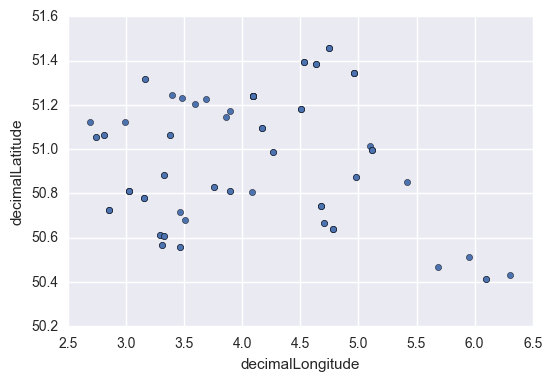

In [86]:
core_df.iloc[100:200,:].plot(x = "decimalLongitude", y = "decimalLatitude", kind='scatter')